# Homework-3: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [27]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [28]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [29]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [30]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [34]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [35]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [36]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 3.3259	 Accuracy 0.1300
Epoch [0][20]	 Batch [50][550]	 Training Loss 4.7014	 Accuracy 0.1345
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.5957	 Accuracy 0.2390
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.8650	 Accuracy 0.2963
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.4846	 Accuracy 0.3508
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.2496	 Accuracy 0.4096
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.0897	 Accuracy 0.4588
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.9740	 Accuracy 0.4977
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.8855	 Accuracy 0.5301
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.8158	 Accuracy 0.5564
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.7591	 Accuracy 0.5793

Epoch [0]	 Average training loss 0.7127	 Average training accuracy 0.5977
Epoch [0]	 Average validation loss 0.2204	 Average validation accuracy 0.8230

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.2080	 Accuracy 0.8300


Epoch [8]	 Average training loss 0.1099	 Average training accuracy 0.9095
Epoch [8]	 Average validation loss 0.0919	 Average validation accuracy 0.9330

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0891	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.1014	 Accuracy 0.9204
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.1032	 Accuracy 0.9167
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.1063	 Accuracy 0.9128
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.1058	 Accuracy 0.9137
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.1057	 Accuracy 0.9139
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.1056	 Accuracy 0.9140
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.1062	 Accuracy 0.9129
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.1063	 Accuracy 0.9127
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.1064	 Accuracy 0.9126
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.1067	 Accuracy 0.9119

Epoch [9]	 Average training loss 0.1065	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0941	 Accuracy 0.9200
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0943	 Accuracy 0.9200
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0947	 Accuracy 0.9191

Epoch [17]	 Average training loss 0.0946	 Average training accuracy 0.9191
Epoch [17]	 Average validation loss 0.0802	 Average validation accuracy 0.9384

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0809	 Accuracy 0.9500
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0881	 Accuracy 0.9284
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0900	 Accuracy 0.9246
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0928	 Accuracy 0.9205
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0924	 Accuracy 0.9217
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0925	 Accuracy 0.9218
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0926	 Accuracy 0.9216
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0932	 Accuracy 0.9206
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.0934	

In [37]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9263.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [38]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [39]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 4.2168	 Accuracy 0.1900
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.6317	 Accuracy 0.5265
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.4476	 Accuracy 0.6481
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.3742	 Accuracy 0.7031
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.3302	 Accuracy 0.7371
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.2995	 Accuracy 0.7626
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.2772	 Accuracy 0.7807
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.2601	 Accuracy 0.7937
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.2460	 Accuracy 0.8055
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.2345	 Accuracy 0.8151
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.2249	 Accuracy 0.8222

Epoch [0]	 Average training loss 0.2161	 Average training accuracy 0.8295
Epoch [0]	 Average validation loss 0.1102	 Average validation accuracy 0.9262

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.1108	 Accuracy 0.9500

Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0621	 Accuracy 0.9635
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0639	 Accuracy 0.9605
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0650	 Accuracy 0.9600
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0647	 Accuracy 0.9596
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0643	 Accuracy 0.9595
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0648	 Accuracy 0.9587
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0649	 Accuracy 0.9582
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0650	 Accuracy 0.9584
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0650	 Accuracy 0.9582
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0655	 Accuracy 0.9573

Epoch [9]	 Average training loss 0.0652	 Average training accuracy 0.9575
Epoch [9]	 Average validation loss 0.0589	 Average validation accuracy 0.9698

Epoch [10][20]	 Batch [0][550]	 Training Loss 0.0594	 Accuracy 0.9700
Epoch [10][20]	 Batch [50][550]	 Training Loss 0.0602	 Accuracy 0.9


Epoch [17]	 Average training loss 0.0551	 Average training accuracy 0.9669
Epoch [17]	 Average validation loss 0.0522	 Average validation accuracy 0.9728

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0509	 Accuracy 0.9700
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0510	 Accuracy 0.9724
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0526	 Accuracy 0.9695
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0536	 Accuracy 0.9696
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0534	 Accuracy 0.9694
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0532	 Accuracy 0.9694
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0537	 Accuracy 0.9685
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0538	 Accuracy 0.9685
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.0540	 Accuracy 0.9684
Epoch [18][20]	 Batch [450][550]	 Training Loss 0.0540	 Accuracy 0.9681
Epoch [18][20]	 Batch [500][550]	 Training Loss 0.0545	 Accuracy 0.9673

Epoch [18]	 Average training loss 0.0543	 Average trai

In [40]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9636.



## Plot

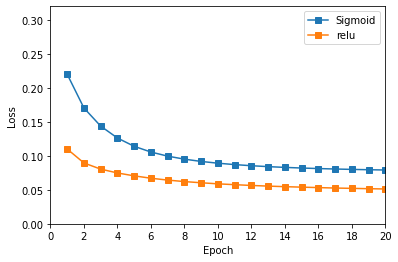

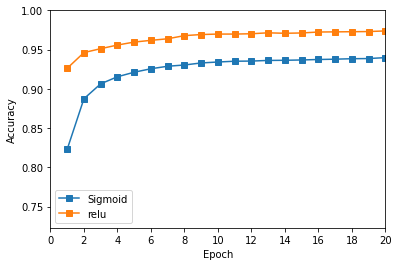

In [41]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [42]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [43]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [44]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 3.2443	 Accuracy 0.0600
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.8360	 Accuracy 0.5524
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.5177	 Accuracy 0.6624
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.3284	 Accuracy 0.7091
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.1965	 Accuracy 0.7396
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.0942	 Accuracy 0.7611
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.0163	 Accuracy 0.7778
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.9600	 Accuracy 0.7887
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.9086	 Accuracy 0.7986
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.8669	 Accuracy 0.8061
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.8318	 Accuracy 0.8120

Epoch [0]	 Average training loss 0.8009	 Average training accuracy 0.8175
Epoch [0]	 Average validation loss 0.3918	 Average validation accuracy 0.9112

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.4584	 Accuracy 0.9000


Epoch [8]	 Average training loss 0.2921	 Average training accuracy 0.9199
Epoch [8]	 Average validation loss 0.2312	 Average validation accuracy 0.9400

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.2457	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.2616	 Accuracy 0.9324
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.2723	 Accuracy 0.9272
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.2834	 Accuracy 0.9230
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.2812	 Accuracy 0.9235
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.2809	 Accuracy 0.9239
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.2813	 Accuracy 0.9241
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.2834	 Accuracy 0.9229
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.2836	 Accuracy 0.9224
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.2844	 Accuracy 0.9222
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.2858	 Accuracy 0.9219

Epoch [9]	 Average training loss 0.2863	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 0.2514	 Accuracy 0.9327
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.2523	 Accuracy 0.9323
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.2538	 Accuracy 0.9318

Epoch [17]	 Average training loss 0.2544	 Average training accuracy 0.9317
Epoch [17]	 Average validation loss 0.2041	 Average validation accuracy 0.9490

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.2152	 Accuracy 0.9600
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.2280	 Accuracy 0.9424
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.2379	 Accuracy 0.9381
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.2473	 Accuracy 0.9343
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.2459	 Accuracy 0.9347
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.2459	 Accuracy 0.9348
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.2466	 Accuracy 0.9346
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.2483	 Accuracy 0.9338
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.2485	

### Test

In [45]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9359.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [46]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [47]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.4622	 Accuracy 0.1300
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.0280	 Accuracy 0.7249
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.7698	 Accuracy 0.7943
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.6610	 Accuracy 0.8206
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.5889	 Accuracy 0.8402
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.5402	 Accuracy 0.8524
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.5055	 Accuracy 0.8617
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.4808	 Accuracy 0.8679
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.4593	 Accuracy 0.8732
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.4415	 Accuracy 0.8778
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.4279	 Accuracy 0.8817

Epoch [0]	 Average training loss 0.4153	 Average training accuracy 0.8851
Epoch [0]	 Average validation loss 0.2119	 Average validation accuracy 0.9444

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.2629	 Accuracy 0.9500


Epoch [8]	 Average training loss 0.1071	 Average training accuracy 0.9726
Epoch [8]	 Average validation loss 0.1019	 Average validation accuracy 0.9734

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0989	 Accuracy 0.9800
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0937	 Accuracy 0.9773
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0985	 Accuracy 0.9754
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0983	 Accuracy 0.9752
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0987	 Accuracy 0.9752
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0983	 Accuracy 0.9751
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0996	 Accuracy 0.9747
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.1003	 Accuracy 0.9746
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.1002	 Accuracy 0.9746
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.1009	 Accuracy 0.9745
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.1022	 Accuracy 0.9741

Epoch [9]	 Average training loss 0.1020	 Average training accuracy 

Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0792	 Accuracy 0.9814
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0803	 Accuracy 0.9810

Epoch [17]	 Average training loss 0.0802	 Average training accuracy 0.9809
Epoch [17]	 Average validation loss 0.0875	 Average validation accuracy 0.9772

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0767	 Accuracy 0.9900
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0722	 Accuracy 0.9824
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0761	 Accuracy 0.9823
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0750	 Accuracy 0.9822
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0757	 Accuracy 0.9820
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0754	 Accuracy 0.9821
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0765	 Accuracy 0.9820
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0769	 Accuracy 0.9820
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.0772	 Accuracy 0.9819
Epoch [18][20]	 Batch [450][550]	 Training Loss 0.0778	

In [48]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9748.



## Plot

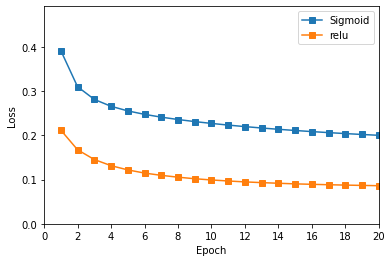

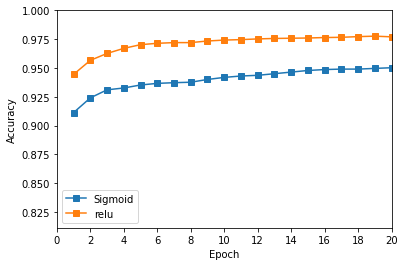

In [49]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework3, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

In [50]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

In [51]:
criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

sigmoidMLP2 = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP2.add(FCLayer(784, 256))
sigmoidMLP2.add(SigmoidLayer())
sigmoidMLP2.add(FCLayer(256, 64))
sigmoidMLP2.add(SigmoidLayer())
sigmoidMLP2.add(FCLayer(64, 10))

In [52]:
sigmoidMLP2, sig_loss2, sig_acc2 = train(sigmoidMLP2, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.7336	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.2146	 Accuracy 0.3265
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.0911	 Accuracy 0.4555
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.9665	 Accuracy 0.5290
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.8386	 Accuracy 0.5790
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.7134	 Accuracy 0.6139
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.6016	 Accuracy 0.6426
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.5101	 Accuracy 0.6639
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.4258	 Accuracy 0.6827
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.3535	 Accuracy 0.6985
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.2902	 Accuracy 0.7116

Epoch [0]	 Average training loss 1.2345	 Average training accuracy 0.7233
Epoch [0]	 Average validation loss 0.5671	 Average validation accuracy 0.8838

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.6370	 Accuracy 0.8500


Epoch [8]	 Average training loss 0.3131	 Average training accuracy 0.9143
Epoch [8]	 Average validation loss 0.2499	 Average validation accuracy 0.9348

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.2689	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.2813	 Accuracy 0.9263
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.2925	 Accuracy 0.9216
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.3054	 Accuracy 0.9170
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.3028	 Accuracy 0.9175
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.3020	 Accuracy 0.9178
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.3024	 Accuracy 0.9181
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.3049	 Accuracy 0.9168
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.3049	 Accuracy 0.9167
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.3057	 Accuracy 0.9164
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.3073	 Accuracy 0.9160

Epoch [9]	 Average training loss 0.3078	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 0.2774	 Accuracy 0.9249
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.2784	 Accuracy 0.9246
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.2800	 Accuracy 0.9240

Epoch [17]	 Average training loss 0.2805	 Average training accuracy 0.9238
Epoch [17]	 Average validation loss 0.2256	 Average validation accuracy 0.9428

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.2415	 Accuracy 0.9500
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.2525	 Accuracy 0.9349
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.2628	 Accuracy 0.9309
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.2746	 Accuracy 0.9258
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.2724	 Accuracy 0.9269
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.2720	 Accuracy 0.9267
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.2725	 Accuracy 0.9268
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.2746	 Accuracy 0.9258
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.2748	

In [53]:
test(sigmoidMLP2, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9279.



In [54]:
reluMLP2 = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
reluMLP2.add(FCLayer(784, 256))
reluMLP2.add(ReLULayer())
reluMLP2.add(FCLayer(256, 64))
reluMLP2.add(ReLULayer())
reluMLP2.add(FCLayer(64, 10))

In [55]:
reluMLP2, relu_loss2, relu_acc2 = train(reluMLP2, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.7435	 Accuracy 0.1500
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.9305	 Accuracy 0.7320
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.6796	 Accuracy 0.8057
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.5801	 Accuracy 0.8325
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.5141	 Accuracy 0.8517
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.4676	 Accuracy 0.8647
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.4339	 Accuracy 0.8744
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.4088	 Accuracy 0.8815
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.3868	 Accuracy 0.8880
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.3685	 Accuracy 0.8933
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.3551	 Accuracy 0.8971

Epoch [0]	 Average training loss 0.3421	 Average training accuracy 0.9010
Epoch [0]	 Average validation loss 0.1688	 Average validation accuracy 0.9528

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.2277	 Accuracy 0.9500


Epoch [8]	 Average training loss 0.0567	 Average training accuracy 0.9862
Epoch [8]	 Average validation loss 0.0782	 Average validation accuracy 0.9796

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0533	 Accuracy 0.9900
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0495	 Accuracy 0.9878
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0526	 Accuracy 0.9875
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0529	 Accuracy 0.9873
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0525	 Accuracy 0.9877
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0515	 Accuracy 0.9880
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0519	 Accuracy 0.9881
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0518	 Accuracy 0.9882
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0523	 Accuracy 0.9880
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0524	 Accuracy 0.9879
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0532	 Accuracy 0.9876

Epoch [9]	 Average training loss 0.0530	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0377	 Accuracy 0.9931
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0377	 Accuracy 0.9929
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0384	 Accuracy 0.9928

Epoch [17]	 Average training loss 0.0383	 Average training accuracy 0.9927
Epoch [17]	 Average validation loss 0.0712	 Average validation accuracy 0.9806

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0356	 Accuracy 0.9900
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0355	 Accuracy 0.9927
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0374	 Accuracy 0.9926
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0368	 Accuracy 0.9930
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0364	 Accuracy 0.9932
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0357	 Accuracy 0.9933
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0362	 Accuracy 0.9933
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0362	 Accuracy 0.9934
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.0367	

In [56]:
test(reluMLP2, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9793.



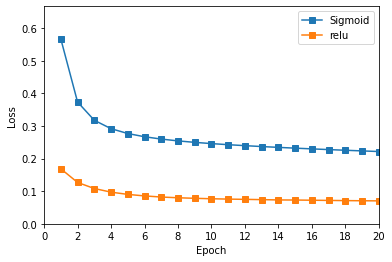

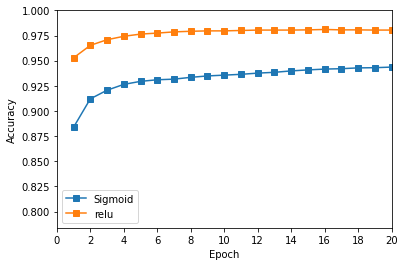

In [57]:
plot_loss_and_acc({'Sigmoid': [sig_loss2, sig_acc2],
                   'relu': [relu_loss2, relu_acc2]})